# MODNet - Inference with onnx

This notebook is the modified version of the main [colab demo](https://colab.research.google.com/drive/1GANpbKT06aEFiW-Ssx0DQnnEADcXwQG6?usp=sharing#scrollTo=JOmYOHKfgQ5Y). Refer it for more information.


In this demo, we provide a very high performance **inference ready onnx model** for image matting. It also supports dynamic input and output shapes. <b><font color='#00FF0'>The inference time is also very less and you don't need **GPU** to run it. </font></b>

## 1. Preparation

Clone the repository and download the pretrained model.

In [ ]:
#!pip install onnx onnxruntime

   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------- ----------- 10.5/14.5 MB 54.4 MB/s eta 0:00:01
   ---------------------------------------- 14.5/14.5 MB 60.7 MB/s eta 0:00:00


In [ ]:
#!pip install requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)


In [2]:

import os

# clone the repository
%cd /content
if not os.path.exists('MODNet'):
  !git clone https://github.com/manthan3C273/MODNet
%cd MODNet/

# dowload the onnx model for image matting
model = 'modnet.onnx'
if not os.path.exists(model):
  !gdown --id 1cgycTQlYXpTh26gB9FTnthE7AvruV8hd \
          -O pretrained/modnet.onnx


[WinError 2] 系统找不到指定的文件。: '/content'
c:\Users\14122\Downloads
c:\Users\14122\Downloads\MODNet


Cloning into 'MODNet'...
'gdown' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [1]:
import os
import requests

# Set the working directory to your desired local path
local_path = r"F:/ModNet"  # Change this to your desired path
os.chdir(local_path)

# Clone the repository if it doesn't already exist
if not os.path.exists('MODNet'):
    os.system("git clone https://github.com/manthan3C273/MODNet")
os.chdir("MODNet")

# Download the ONNX model for image matting
model_dir = "pretrained"
model_path = os.path.join(model_dir, "modnet.onnx")
os.makedirs(model_dir, exist_ok=True)

if not os.path.exists(model_path):
    url = "https://drive.google.com/uc?id=1cgycTQlYXpTh26gB9FTnthE7AvruV8hd"
    response = requests.get(url)
    with open(model_path, "wb") as f:
        f.write(response.content)

print(f"Model downloaded to: {model_path}")

Model downloaded to: pretrained\modnet.onnx


## 2. Upload image

Upload portrait images to be processed (only PNG and JPG format are supported).

Download demo image. Photo by Charlotte May from [Pexels](https://www.pexels.com/photo/unrecognizable-asian-woman-with-rucksack-in-town-5965592/)

In [2]:
# dowload image
image = 'image.jpg'
if not os.path.exists(image):
  !gdown --id 1fkyh03NEuSwvjFttYVwV7TjnJML04Xn6 \
          -O image.jpg


'gdown' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [3]:
import os
import requests

# 自定义图片保存路径
local_path = r"C:\Users\14122\Downloads"  # 修改为你希望保存图片的路径
os.makedirs(local_path, exist_ok=True)  # 如果路径不存在，则创建
image_path = os.path.join(local_path, "image.jpg")

# 下载图片
if not os.path.exists(image_path):
    url = "https://drive.google.com/uc?id=1fkyh03NEuSwvjFttYVwV7TjnJML04Xn6"
    response = requests.get(url)
    if response.status_code == 200:
        with open(image_path, "wb") as f:
            f.write(response.content)
        print(f"Image downloaded to: {image_path}")
    else:
        print(f"Failed to download image. HTTP status code: {response.status_code}")
else:
    print(f"Image already exists at: {image_path}")

Image downloaded to: C:\Users\14122\Downloads\image.jpg


## 3. Inference

Run the following command for alpha matte prediction.

In [4]:
!python demo/image_matting/Inference_with_ONNX/inference_onnx.py \
        --image-path=image.jpg \
        --output-path=matte.png \
        --model-path=pretrained/modnet.onnx

Cannot find input path: image.jpg


In [5]:
import subprocess

# 定义脚本路径和参数
script_path = r"F:/ModNet/MODNet/demo/image_matting/Inference_with_ONNX/inference_onnx.py"
image_path = r"C:\Users\14122\Downloads\image.jpg"  # 自定义图片路径
output_path = r"F:/ModNet/MODNet/image/output/matte_2.png"  # 自定义输出路径
model_path = r"F:/ModNet/MODNet/pretrained/modnet.onnx"  # 自定义模型路径

# 调用脚本
subprocess.run([
    "python", script_path,
    "--image-path", image_path,
    "--output-path", output_path,
    "--model-path", model_path
])

print(f"Inference completed. Output saved to: {output_path}")

Inference completed. Output saved to: F:/ModNet/MODNet/image/output/matte_2.png


## 4. Visualization

Display the results (from left to right: image, foreground, and alpha matte)

In [10]:
#!pip install matplotlib

  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 79.2 MB/s eta 0:00:00
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl (55 kB)
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)


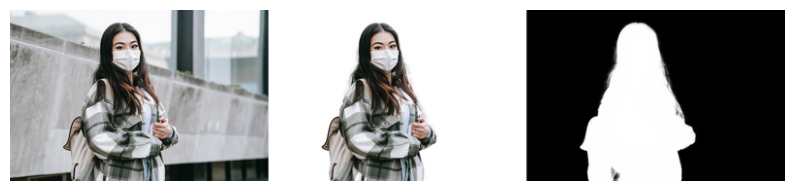

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def combined_display(image, matte):
    # calculate display resolution
    w, h = image.width, image.height
    rw, rh = 800, int(h * 800 / (3 * w))

    # obtain predicted foreground
    image = np.asarray(image)
    if len(image.shape) == 2:
        image = image[:, :, None]
    if image.shape[2] == 1:
        image = np.repeat(image, 3, axis=2)
    elif image.shape[2] == 4:
        image = image[:, :, 0:3]
    matte = np.repeat(np.asarray(matte)[:, :, None], 3, axis=2) / 255
    foreground = image * matte + np.full(image.shape, 255) * (1 - matte)

    # combine image, foreground, and alpha into one line
    combined = np.concatenate((image, foreground, matte * 255), axis=1)
    combined = Image.fromarray(np.uint8(combined)).resize((rw, rh))
    return combined

# visualize all images
image_path = r"C:\Users\14122\Downloads\image.jpg"  # 自定义图片路径
matte_path = r"F:/ModNet/MODNet/image/output/matte_2.png"  # 自定义matte路径

image = Image.open(image_path)
matte = Image.open(matte_path)

# 显示结果
result = combined_display(image, matte)
plt.figure(figsize=(10, 5))
plt.imshow(result)
plt.axis('off')
plt.show()

### Batch processing images

In [15]:
import os
import numpy as np
from PIL import Image
import onnxruntime

# 定义函数：预处理输入图像
def preprocess_image(image_path):
    # 加载图像并调整大小
    image = Image.open(image_path).convert("RGB")
    image = image.resize((512, 512))  # 根据模型要求调整大小
    image = np.array(image).astype(np.float32) / 255.0  # 归一化到 [0, 1]
    image = np.transpose(image, (2, 0, 1))  # HWC -> CHW
    image = np.expand_dims(image, axis=0)  # 添加 batch 维度
    return image

# 定义函数：后处理 Alpha Matte
def postprocess_matte(matte, original_size):
    matte = matte[0, 0]  # 去掉 batch 和通道维度
    matte = (matte * 255).astype(np.uint8)  # 反归一化到 [0, 255]
    matte = Image.fromarray(matte).resize(original_size, Image.BILINEAR)  # 调整为原图大小
    return matte

# 定义函数：生成前景图
def generate_foreground(image, matte):
    image = np.asarray(image).astype(np.float32)
    if len(image.shape) == 2:
        image = image[:, :, None]
    if image.shape[2] == 1:
        image = np.repeat(image, 3, axis=2)
    elif image.shape[2] == 4:
        image = image[:, :, 0:3]
    matte = np.asarray(matte).astype(np.float32) / 255.0
    matte = np.expand_dims(matte, axis=2)  # 添加通道维度
    foreground = image * matte + np.full(image.shape, 255) * (1 - matte)
    return Image.fromarray(np.uint8(foreground))

# 模型路径
model_path = r"F:/ModNet/MODNet/pretrained/modnet.onnx"  # 替换为你的模型路径
session = onnxruntime.InferenceSession(model_path)

# 输入和输出文件夹
input_image_dir = r"F:/ModNet/MODNet/image/input_folder"  # 输入图像文件夹路径
output_matte_dir = r"F:/ModNet/MODNet/image/output/mattes"  # 输出 Alpha Matte 文件夹路径
output_foreground_dir = r"F:/ModNet/MODNet/image/output/foregrounds"  # 输出前景图像文件夹路径

# 确保输出文件夹存在
os.makedirs(output_matte_dir, exist_ok=True)
os.makedirs(output_foreground_dir, exist_ok=True)

# 遍历输入文件夹中的所有图像
for filename in os.listdir(input_image_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # 检查是否为有效图像文件
        image_path = os.path.join(input_image_dir, filename)
        print(f"Processing: {filename}")

        # 加载原图并保存原始大小
        original_image = Image.open(image_path).convert("RGB")
        original_size = original_image.size

        # 预处理图像
        input_image = preprocess_image(image_path)

        # 模型推理
        input_name = session.get_inputs()[0].name
        output_name = session.get_outputs()[0].name
        predicted_matte = session.run([output_name], {input_name: input_image})[0]

        # 后处理 Alpha Matte
        alpha_matte = postprocess_matte(predicted_matte, original_size)
        matte_output_path = os.path.join(output_matte_dir, filename)
        alpha_matte.save(matte_output_path)
        print(f"Alpha Matte saved to: {matte_output_path}")

        # 生成前景图
        foreground = generate_foreground(original_image, alpha_matte)
        foreground_output_path = os.path.join(output_foreground_dir, filename)
        foreground.save(foreground_output_path)
        print(f"Foreground saved to: {foreground_output_path}")

Processing: image_ (0).jpg
Alpha Matte saved to: F:/ModNet/MODNet/image/output/mattes\image_ (0).jpg
Foreground saved to: F:/ModNet/MODNet/image/output/foregrounds\image_ (0).jpg
Processing: image_ (1).jpg
Alpha Matte saved to: F:/ModNet/MODNet/image/output/mattes\image_ (1).jpg
Foreground saved to: F:/ModNet/MODNet/image/output/foregrounds\image_ (1).jpg
Processing: image_ (10).jpg
Alpha Matte saved to: F:/ModNet/MODNet/image/output/mattes\image_ (10).jpg
Foreground saved to: F:/ModNet/MODNet/image/output/foregrounds\image_ (10).jpg
Processing: image_ (100).jpg
Alpha Matte saved to: F:/ModNet/MODNet/image/output/mattes\image_ (100).jpg
Foreground saved to: F:/ModNet/MODNet/image/output/foregrounds\image_ (100).jpg
Processing: image_ (1000).jpg
Alpha Matte saved to: F:/ModNet/MODNet/image/output/mattes\image_ (1000).jpg
Foreground saved to: F:/ModNet/MODNet/image/output/foregrounds\image_ (1000).jpg
Processing: image_ (1001).jpg
Alpha Matte saved to: F:/ModNet/MODNet/image/output/matte

c:\Users\14122\anaconda3\envs\modnet\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Alpha Matte saved to: F:/ModNet/MODNet/image/output/mattes\image_ (3829).jpg
Foreground saved to: F:/ModNet/MODNet/image/output/foregrounds\image_ (3829).jpg
Processing: image_ (383).jpg
Alpha Matte saved to: F:/ModNet/MODNet/image/output/mattes\image_ (383).jpg
Foreground saved to: F:/ModNet/MODNet/image/output/foregrounds\image_ (383).jpg
Processing: image_ (3830).jpg
Alpha Matte saved to: F:/ModNet/MODNet/image/output/mattes\image_ (3830).jpg
Foreground saved to: F:/ModNet/MODNet/image/output/foregrounds\image_ (3830).jpg
Processing: image_ (3831).jpg
Alpha Matte saved to: F:/ModNet/MODNet/image/output/mattes\image_ (3831).jpg
Foreground saved to: F:/ModNet/MODNet/image/output/foregrounds\image_ (3831).jpg
Processing: image_ (3832).jpg
Alpha Matte saved to: F:/ModNet/MODNet/image/output/mattes\image_ (3832).jpg
Foreground saved to: F:/ModNet/MODNet/image/output/foregrounds\image_ (3832).jpg
Processing: image_ (3833).jpg
Alpha Matte saved to: F:/ModNet/MODNet/image/output/mattes\imag

## 5. Download image

Image with transparent background will be saved and downloaded.

In [ ]:
image.putalpha(matte)
image.save('transparent_img.png')

from google.colab import files
files.download('transparent_img.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import os
import numpy as np
from PIL import Image

def calculate_matte_coverage(matte_dir, threshold=0.95):
    total_images = 0
    over_threshold_count = 0

    for filename in os.listdir(matte_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            total_images += 1
            matte_path = os.path.join(matte_dir, filename)
            matte = Image.open(matte_path).convert("L")  # Convert to grayscale
            matte_array = np.array(matte) / 255.0  # Normalize to [0, 1]
            coverage = np.mean(matte_array > threshold)  # Calculate coverage
            if coverage < 0.05:
                over_threshold_count += 1

    if total_images == 0:
        print("No images found in the directory.")
        return 0, 0.0

    percentage = (over_threshold_count / total_images) * 100
    return over_threshold_count, percentage

# 使用 matte 文件夹路径
matte_dir = output_matte_dir  # 使用已定义的 matte 文件夹路径
count, percentage = calculate_matte_coverage(matte_dir)

print(f"Number of matte images with over 95% coverage: {count}")
print(f"Percentage of such images: {percentage:.2f}%")

Number of matte images with over 95% coverage: 1305
Percentage of such images: 32.74%


In [18]:
def save_remaining_foreground_images(matte_dir, output_dir, threshold=0.95):
    os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists

    for filename in os.listdir(matte_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            matte_path = os.path.join(matte_dir, filename)
            matte = Image.open(matte_path).convert("L")  # Convert to grayscale
            matte_array = np.array(matte) / 255.0  # Normalize to [0, 1]
            coverage = np.mean(matte_array > threshold)  # Calculate coverage
            if coverage >= 0.05:  # If coverage is less than 95%
                image_path = os.path.join(input_image_dir, filename)
                if os.path.exists(image_path):  # Ensure the corresponding input image exists
                    original_image = Image.open(image_path).convert("RGB")
                    foreground = generate_foreground(original_image, matte)
                    output_path = os.path.join(output_dir, filename)
                    foreground.save(output_path)  # Save the foreground image

# Define the output directory for foreground images
remaining_foreground_dir = r"F:/ModNet/MODNet/image/output/remaining_foregrounds"

# Save the remaining foreground images
save_remaining_foreground_images(matte_dir, remaining_foreground_dir)

print(f"Remaining foreground images saved to: {remaining_foreground_dir}")

c:\Users\14122\anaconda3\envs\modnet\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Remaining foreground images saved to: F:/ModNet/MODNet/image/output/remaining_foregrounds


In [19]:
import os
import shutil

# 定义源文件夹和目标文件夹路径
source_folder = r"F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\output_folder"
destination_folder = r"F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered"

# 确保目标文件夹存在
os.makedirs(destination_folder, exist_ok=True)

# 获取 matte_dir 中的文件名（不带路径）
matte_filenames = {os.path.basename(filename) for filename in os.listdir(matte_dir)}

# 遍历源文件夹中的文件
for filename in os.listdir(source_folder):
    if filename in matte_filenames:  # 检查文件是否在 matte_filenames 中
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        shutil.copy(source_path, destination_path)  # 复制文件
        print(f"Copied: {filename} to {destination_folder}")

print("File filtering and copying completed.")

Copied: image_ (0).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (10).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (100).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1000).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1001).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1002).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1003).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1004).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1005).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: i

In [24]:
import os
import shutil

# 定义源文件夹和目标文件夹路径
source_folder = r"F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\output_folder"
destination_folder = r"F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered"
foreground_folder = r"F:\ModNet\MODNet\image\output\remaining_foregrounds"

# 确保目标文件夹存在
os.makedirs(destination_folder, exist_ok=True)

# 获取 foreground_folder 中的文件名（不带路径）
foreground_filenames = {os.path.basename(filename) for filename in os.listdir(foreground_folder)}

# 遍历源文件夹中的文件
for filename in os.listdir(source_folder):
    if filename in foreground_filenames:  # 检查文件是否在 foreground_filenames 中
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        shutil.copy(source_path, destination_path)  # 复制文件
        print(f"Copied: {filename} to {destination_folder}")

print("File filtering and copying completed.")

Copied: image_ (0).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (10).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1000).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1001).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1003).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1004).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1005).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1006).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1007).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copied: image_ (1008).jpg to F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered
Copie

In [25]:
import os

# 指定文件夹路径
folder_path = r"F:\Github\MemePic\MemePic\Met MEME\Dataset\Raw\Met_Meme\Matte_Filtered"
# 获取文件数量
file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print(f"文件数量: {file_count}")

文件数量: 2681
